In [1]:
#libraries for visualization and organization
import pandas as pd

#libraries for plotting and graphing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import seaborn as sns
sns.set()
from pylab import *
from scipy import special, optimize

#libraries for modelling
import scipy
from scipy.stats import norm
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split


#libraries for cleaning data, imputing values
from sklearn.preprocessing import Imputer
import sklearn as sk

#silencing warnings and other rubbish
import warnings
warnings.filterwarnings("ignore")


C:\Users\Malconius\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


Loading in our dataset -- housing data. 

In [2]:
#loading in our training dataset -- leaving testing set alone until we need it later. 
train = pd.read_csv(r"C:\Users\Malconius\Documents\Econ213R\hw2\train.csv")
train.shape #finding number of observations before we append the test set to it in order to create traintest

(1460, 81)

In [3]:
test =  pd.read_csv(r"C:\Users\Malconius\Documents\Econ213R\hw2\test.csv")
test.shape

(1459, 80)

In [4]:
traintest = train.append(test).reset_index(drop=True)
traintest.shape

(2919, 81)

Let's look at some surface level descriptive data:

In [5]:
#finding some descriptive states about our dataset. 
pd.set_option('max_columns', 400)
traintest.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


A few variables look concerning, namely MasVnrArea (lots of 0 values), BsmtFinSF1, BsmtFinSF2, and a few other variables. 
I don't like those 0 values in so many percentiles, so I think we have more than a few missing observations. Before we get too concerned about this, I'm going to look at variables with missing values before I worry about other problems with the data.

In [6]:
traintest.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageCond       159
GarageQual       159
dtype: int64

Because a few of those variables are missing for almost the entirety of our dataset, I am going to drop them. Variables in this category are PoolQC, MiscFeature, Alley, Fence, and FireplaceQu. 

For variables LotFrontage and below, I think we can reasonably create data that will help us make use of the existing data we have. 

In [7]:
#dropping widely missing variables
traintest = traintest.drop(["PoolQC","MiscFeature","Alley", "Fence"], axis=1)

In [8]:
#checking to find remaining missing values
traintest.isnull().sum().sort_values(ascending=False).head(14)

SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
dtype: int64

I will wait until later to create an accurately imputed value for LotFrontage, so let's move onto the Garage variables for now. 

Without bothering to check, I am going to assume that the same observations missing one of the garage variables are also missing the others. That doesn't bother me too much, especially considering that they are less than 7% of our dataset. Looking at the variable descriptions provided with the data, we can see that missing garage variables means that the house does not have a garage. So we can mark these as "None" to match the variable codification descriptions. 

In [9]:
#garage* variables -- taking a shot in the dark and guessing that all 81 houses are the same missing these variables
#missing garage variables indicate no garage, filling variables.
traintest[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]] = traintest[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]].fillna("None")

In [10]:
#looks like the 81 houses shared the missing values
traintest.isnull().sum().sort_values(ascending=False).head(9)

SalePrice       1459
FireplaceQu     1420
LotFrontage      486
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
dtype: int64

Because a single "Electrical" observation is missing, I am going to replace it with the mode of the variable. This replacement is fine for our purposes, as a single value will not heavily influence our models later. 

In [11]:
#filling the missing electrical value with the mode -- preventing the entry of and bias by an outlier
traintest.Electrical.fillna(value=traintest.Electrical.mode()[0], inplace=True)

In [12]:
#finding remaining missing values
traintest.isnull().sum().sort_values(ascending=False).head(9)

SalePrice       1459
FireplaceQu     1420
LotFrontage      486
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
dtype: int64

Now I will start to dig into these final remaining variables that constitute a significant proportion of our dataset. I'll create a method for filling in LotFrontage, and use a similar method for the rest of the variables. 

First, I want to determine which variable(s) are the most highly correlated with LotFrontage. Once this variable is known, we will divide our training dataset up into deciles. Using these deciles, we will match with that most-correlated variable and assign the LotFrontage missing values the mean value from its corresponding decile.

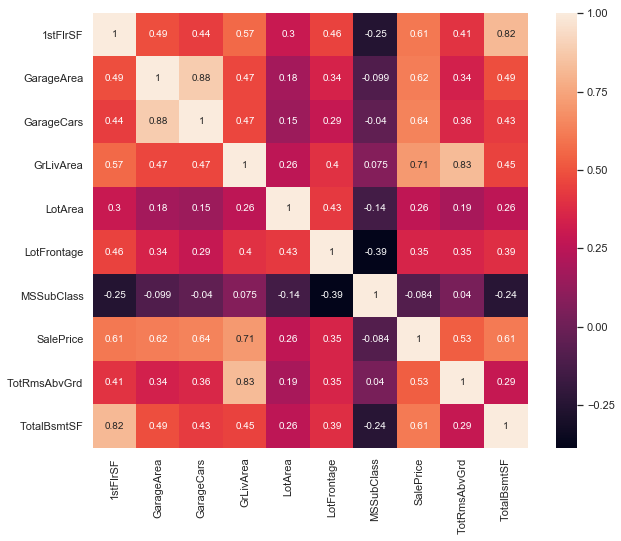

In [13]:
#creating a heatmap to display correlations between LotFrontage and other variables. 
#We are restricting this graph to variables that have at least a .3 correlation. 
correlations = traintest.corr()
LotFrontageCorr = correlations.index[abs(correlations['LotFrontage'])>.3]
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(train[LotFrontageCorr].corr(), square=True, annot=True)


In [14]:
correlations.LotFrontage.head(20)

1stFlrSF         0.458247
2ndFlrSF         0.026545
3SsnPorch        0.028289
BedroomAbvGr     0.234892
BsmtFinSF1       0.219408
BsmtFinSF2       0.047431
BsmtFullBath     0.113245
BsmtHalfBath    -0.025629
BsmtUnfSF        0.113714
EnclosedPorch    0.011509
Fireplaces       0.261970
FullBath         0.181668
GarageArea       0.359786
GarageCars       0.310587
GrLivArea        0.382462
HalfBath         0.039452
Id              -0.027549
KitchenAbvGr     0.004676
LotArea          0.489896
LotFrontage      1.000000
Name: LotFrontage, dtype: float64

From this and the heatmap, we can see that LotArea is the most highly correlated with LotFrontage. Using this information, we will put LotArea in bins to quasi-categorize it. After that, we want to fill in our missing variables with the means of the bins to which their LotArea corresponds.

For example, if one house had a LotArea of 55 sq. ft, then we would look for the bin that contained 55 sq ft, retrieve the median LotFrontage value for that bin, and assign it to our house with the missing value. We will use median to avoid the bias that an outlier could bring into our data.

In [15]:
traintest["BinnedArea"] = pd.qcut(traintest['LotArea'], 10)

In [16]:
traintest.BinnedArea.head(5)

0      (7960.4, 8741.0]
1     (9453.0, 10151.6]
2    (11001.2, 12203.8]
3     (9453.0, 10151.6]
4    (12203.8, 14300.6]
Name: BinnedArea, dtype: category
Categories (10, interval[float64]): [(1299.999, 4922.4] < (4922.4, 7007.6] < (7007.6, 7960.4] < (7960.4, 8741.0] ... (10151.6, 11001.2] < (11001.2, 12203.8] < (12203.8, 14300.6] < (14300.6, 215245.0]]

In [17]:
traintest['LotFrontage'] = traintest.groupby(traintest['BinnedArea'])['LotFrontage'].transform(lambda x: x.fillna(x.median))

In [18]:
#finding remaining missing values
traintest.isnull().sum().sort_values(ascending=False).head(9)

SalePrice       1459
FireplaceQu     1420
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
dtype: int64

It looks like we have succesfully filled in the values for our LotFrontage. Moving onto other variables now.

Let's go from the top of the list down. BsmtFinType2 has some missing values, but this can be explained from the notes that came with our data. Missing values for this variable are just NA, but Python interpretted them as missing when the data was imported. 

In [19]:
#replacing missing values with "NA"
traintest.BsmtFinType2 = traintest.BsmtFinType2.fillna("No Basement")

Net variable on the list is the MasVnrType. From out data description, we know that these values are missing if a finish does not exist in the house. Therefore, we can lable these as "NA". Corresponding to this, MasVnrArea is the area of MasVnrType, so we can replace these with 0.

In [20]:
traintest.MasVnrType = traintest.MasVnrType.fillna("No Finish")
traintest.MasVnrArea = traintest.MasVnrArea.fillna(0)

In [21]:
#finding remaining missing values
traintest.isnull().sum().sort_values(ascending=False).head(6)

SalePrice       1459
FireplaceQu     1420
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType1      79
dtype: int64

In [22]:
#finding values of our categorical variable BsmtExposure
traintest.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [23]:
traintest.BsmtExposure.isnull().sum()

82

In [24]:
traintest.BsmtExposure = traintest.BsmtExposure.fillna("No Basement")

Now for BsmtQual -- missing values also indicate no basement

In [25]:
traintest.BsmtQual = traintest.BsmtQual.fillna("No Basement")

BsmtFinType1 is the finish type of the basement, missing indicates no basement.

In [26]:
traintest.BsmtFinType1 = traintest.BsmtFinType1.fillna("No Basement")

BsmtCond is the condition of basement, missing values are for houses simply missing basements.

In [27]:
traintest.BsmtCond = traintest.BsmtCond.fillna("No Basement")

Now I will take care of Electrical, then FireplaceQu.

In [28]:
#finding values of our categorical variable Electrical
traintest.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [29]:
traintest.Electrical = traintest.Electrical.fillna("SBrkr")

In [30]:
traintest.FireplaceQu = traintest.FireplaceQu.fillna("No Fireplace")

In [31]:
#finding remaining missing values
traintest.isnull().sum().sort_values(ascending=False).head(20)

SalePrice       1459
MSZoning           4
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
Functional         2
Exterior1st        1
Exterior2nd        1
BsmtUnfSF          1
KitchenQual        1
BsmtFinSF1         1
BsmtFinSF2         1
SaleType           1
GarageArea         1
GarageCars         1
TotalBsmtSF        1
ExterCond          0
FullBath           0
Foundation         0
GarageCond         0
dtype: int64

To spare more lines of near-pointless comments, I will be correcting for any variable that is categorical and simply missing the given feature, or that is not an appropriate value to give the variable, the most common entry will be assigned instead.

In [32]:
categorical = [var for var in traintest.columns if traintest[var].dtype=='O'] #making list of categorical variables, code taken from https://www.kaggle.com/solegalli/feature-engineering-for-house-price-modelling

In [33]:
#filling missing values in categorical variables that have remaining missing values
for x in categorical:
    traintest[x] = traintest[x].fillna(traintest[x].value_counts().index[0])

In [34]:
traintest.isnull().sum().sort_values(ascending=False).head(10)

SalePrice       1459
BsmtFullBath       2
BsmtHalfBath       2
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
GarageArea         1
Exterior2nd        0
dtype: int64

Now I will work on the continuous variables in a similar manner. I will also assign these values the mean value. If more observations were missing, I would take more careful measures to implement the solution I used for LotFrontage. 1 or 2 variables being assigned the median does not bother me too much.

In [35]:
#making list of continuous variables, code taken from https://www.kaggle.com/solegalli/feature-engineering-for-house-price-modelling
continuous = [var for var in traintest.columns if traintest[var].dtype==np.float64] 


In [36]:
#filling missing values in continuous variables that have remaining missing values
for x in continuous:
    if x == "SalePrice": 
        pass
    else:
        traintest[x] = traintest[x].fillna(traintest[x].median())

In [37]:
traintest.isnull().sum().sort_values(ascending=False).head(10)

SalePrice      1459
BinnedArea        0
Electrical        0
ExterCond         0
ExterQual         0
Exterior1st       0
Exterior2nd       0
FireplaceQu       0
Fireplaces        0
Foundation        0
dtype: int64

It looks like we were successful in filling missing values. However, missing values are not the only concern of our dataset. Outliers may be a problem, but it is likely that other variables should exist in our dataset that don't. Looking at the dataset, it appears that one variable exists in a disaggregated form: house size.

The variable that we should consider that does not exist in one consolidated form in our dataset is the area of the house in square feet. With any real house sale, the information we base our understanding of the value of the house on is bedrooms, bathrooms, and size in square feet. Some extremely luxurious houses may have only two or three large bedrooms, but that is far less likely than the same quality of house having a high amount bedrooms and bathrooms. 

In [38]:
#creating total square feet variable
traintest['SqFeet'] = train.TotalBsmtSF + train['1stFlrSF'] + train['2ndFlrSF']

In [39]:
#some descriptive statistics for SqFeet
traintest.SqFeet.describe()

count     1460.000000
mean      2567.048630
std        821.714421
min        334.000000
25%       2009.500000
50%       2474.000000
75%       3004.000000
max      11752.000000
Name: SqFeet, dtype: float64

By engineering this last value, I think we are ready to split our data up into training and testing sets again. Recalling the respective dimensions of the two from when we appended them, I will redefine the 'train' and 'test' dataframes. 

In [40]:
traintest = pd.get_dummies(traintest)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
train = traintest[:1460]
train.shape

In [ ]:
test = traintest[1460:]
test.shape

In [ ]:
traintest.shape

Now that we've effectively cleaned our data by imputing values for any missing observations, it is important that we codify the categorical variables in our data.

In [ ]:
#plotting a histogram for some descriptive data on SalePrice
quant_bins = 75
fig, ax = plt.subplots(figsize=(12,9))
n, bins, patches = ax.hist(train.SalePrice, quant_bins, alpha=0.6,normed=1,edgecolor='black', linewidth=1.2, color='green')
ax.set_xlabel("House Price")
ax.set_ylabel("Percent of dataset (Houses)")

It appears that most of our houses have lower prices, centering around $175,000 or so. This gives us a good starting point to begin taking apart the rest of our data.

Before I fire off any other graphs, I think it would be useful to visualize a few graphs of variables that are highly correlated with SalePrice.

In [ ]:
#creating a heatmap to display correlations between SalePrice and other variables. 
#We are restricting this graph to variables that have at least a .3 correlation. 
correlation_sp = train.corr()
SalePriceCorr = correlation_sp.index[abs(correlation_sp['SalePrice'])>.55]
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(train[SalePriceCorr].corr(), square=True, annot=True)

Looking across the SalePrice Row, it appears that GrLivArea, OverallQual, YearRemodAdd, and any variable with house size in Square Feet are relatively highly correlated with SalePrice. Let's visualize a few of these graphs as scatterplots to visualize their relationships.

Additionally, now that we have our data cleaned in terms of missing values, we need to look for outliers. These outliers won't be determined from simply looking at expensive houses. Instead, we need to look for houses that have uncharacteristically high prices given their other features.

In [ ]:
#changing seaborn plot size
plt.subplots(figsize=(20,15))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

#creating scatter of house size and price
scatterplot_train = sns.scatterplot(x=train.SalePrice, y=train.SqFeet, 
                                    size=train.SalePrice, 
                                    palette=cmap,
                                    hue=train.SalePrice,
                                    sizes=(1, 700), 
                                    data=train,)

#modifying size of legend
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='House Price')
plt.setp(scatterplot_train.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(scatterplot_train.get_legend().get_title(), fontsize='20') # for legend title
#setting title for plot
plt.title('Sale Prices by Size');

Only one or two points look suspect here, so let's try to visualize them better. 

In [ ]:
r = sns.jointplot(x="SqFeet", y="SalePrice", data=train, kind ='reg')

regline = r.ax_joint.get_lines()[0]
regline.set_color('red')

A few of these observations appear to be suspect, namely those with relatively low selling price compared to their size. Let's drop those observations because they lie so far outside the distribution of our data. 

In [ ]:
train = train.drop(train[(train['SqFeet']>7600) & (train['SalePrice']<200000)].index)
#sns.lmplot(x="SalePrice", y="SqFeet", data=train, robust=True, ci=None, scatter_kws={"s": 80}, x_jitter=.0005)
                        
r = sns.jointplot(x="SqFeet", y="SalePrice", data=train, kind ='reg')

regline = r.ax_joint.get_lines()[0]
regline.set_color('red')

Looks like the outliers were succesfully eliminated. Now let's observe the relationship between OverallQual and SalePrice:

In [ ]:
#adding another dimension to our SalesPrice data, considering the knowledge our heatmap of other correlations brings to the table
sns.set_style("whitegrid")

sns.lmplot(x="OverallQual", y="SalePrice", data=train, x_jitter=.05);
plt.title('Sale Prices by Quality');


No observations appear completely out of line here, so we will continue to YearRemodAdd.

For our final graphs, I want to look at the relationship between SalePrice and YearRemodAdd:

In [ ]:
g = sns.jointplot(x="YearRemodAdd", y="SalePrice", data=train, kind ='reg')

regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

Again, there seems to be a significantly positive relationship between SalePrice and YearRemodAdd. Although a few points look a bit out of place, nothing about this graph would indicate that those values make those SalePrices outliers a manner that makes the SalePrice out of the ordinary. 

# Now that we've taken care of our data in every possible way, let's move onto the models. To make my predictions for SalePrice, I am going to use a Linear Regression, XGBoost, and Lasso Regression.